# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [51]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [2]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""
p = round(60 / 100, 3)
q = round(40 / 100, 3)

print("probability that the fruit is an apple: ",  "60/100 =", p)
print("probability that the fruit is an orange: " , "40/100 =", q)

probability that the fruit is an apple:  60/100 = 0.6
probability that the fruit is an orange:  40/100 = 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [97]:
# What is the probability that the first 5 fruits are all apples?
# As there is replacement the changes of taking an apple stay constant for the 5 times
print("What is the probability that the first 5 fruits are all apples? ", round(p**5, 3))
# As previously there is replacement so the probabilities are the multiplication of each case 
print("What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges? ", round(p**5 * q**15, 0)) # without round: 8.349416423424006e-08

What is the probability that the first 5 fruits are all apples?  0.078
What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?  0.0


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [41]:
# your solution here
# binomilnalCoeficient = n! / (x!(n-x)!)
def binCoef(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

print("What is the probability that this time the sample contains 5 apples and 15 oranges? ", round((p**5 * q**15) * binCoef(20, 5), 3)) # without round: 0.0012944935222876579

What is the probability that this time the sample contains 5 apples and 15 oranges?  0.001


In [18]:
# your solution here

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [104]:
# your code here
# P(k)=C(n,k) × p**k × (1−p)**n−k
def pmf(n):
    probs = []
    for k in range(0, n + 1):
        probs.append(binCoef(20, k) * (p**k) * (1-p)**(20-k))
    return probs

print("what is the probability that less than 5 fruits picked are apples? ", round(sum(pmf(4)), 3)) # without round 0.00031703112116863
# Alternatively it can be calculated as: stats.binom.cdf(4, 20, p)

what is the probability that less than 5 fruits picked are apples?  0.0


**Plot the PDF (probability distribution function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

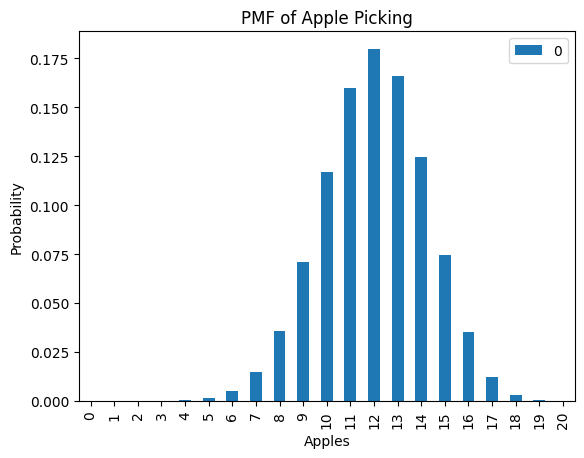

In [108]:
# your code here
# PDF was incorrect because it is for continuous variables and we have discrete here (amount of apples)
# This shoud be PMF (probability mass function) instead

# Please label the axes and give a title to the plot 
pd.DataFrame(pmf(20)).plot.bar()
plt.title('PMF of Apple Picking')
plt.xlabel('Apples')
plt.ylabel('Probability')
plt.show();

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [109]:
def poisDist(k, l):
    # P(k)=(λ**k) * e**(−λ)​ / k!
    # k = Number of events (goals)
    # l = "λ" = Avg Rate
    return ((l**k) * math.exp(l*-1)) / math.factorial(k) 

# K = Number of goals
# l = Num goals per match
round(poisDist(k=5, l=2.3), 3)

# Alternatively it can be calculated as: stats.poisson.pmf(k, l)

0.054

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

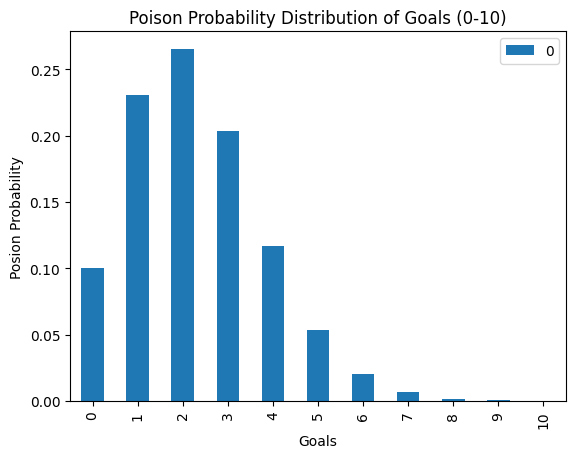

In [113]:
# your code here
# Please label the axes and give a title to the plot 
poisPlot = []
for goals in range(0, 11):
    poisPlot.append(poisDist(k=goals, l=2.3))

pd.DataFrame(poisPlot).plot.bar()
plt.title('Poison Probability Distribution of Goals (0-10)')
plt.xlabel('Goals')
plt.ylabel('Posion Probability')
plt.show();